This notebook will query/join Gaia and Skymapper to get u,g,r,i,z photometry for bright stars. We'll put the query part in this notebook and develop another notebook to make the plots. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from astroquery.gaia import Gaia 


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [4]:
for table in tables:
    print(table.get_qualified_name())

external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_config.tap_config.properties
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiaedr3.gaiaedr3.gaia_source
gaiaedr3.gaiaedr3.agn_cross_id
gaiaedr3.gaiaedr3.commanded_scan_law
gaiaedr3.gaiaedr3.dr2_neighbourhood
gaiaedr3.gaiaedr3.frame_rotator_source
gaiaedr3.gaiaedr3.hipparcos2_best_neighbour
gaiaedr3.gaiaedr

In [5]:
meta=Gaia.load_table('gaiaedr3.gaia_source') 

Retrieving table 'gaiaedr3.gaia_source'
Parsing table 'gaiaedr3.gaia_source'...
Done.


In [6]:
print(meta)

TAP Table name: gaiaedr3.gaiaedr3.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 99


In [7]:
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [8]:
meta2=Gaia.load_table('gaiaedr3.skymapperdr2_best_neighbour')
for column in meta2.columns:
    print(column.name)

Retrieving table 'gaiaedr3.skymapperdr2_best_neighbour'
Parsing table 'gaiaedr3.skymapperdr2_best_neighbour'...
Done.
source_id
original_ext_source_id
angular_distance
number_of_neighbours
number_of_mates
xm_flag


In [9]:
meta3=Gaia.load_table('external.skymapperdr2_master')
for column in meta3.columns:
    print(column.name)

Retrieving table 'external.skymapperdr2_master'
Parsing table 'external.skymapperdr2_master'...
Done.
object_id
raj2000
dej2000
e_raj2000
e_dej2000
smss_j
mean_epoch
rms_epoch
glon
glat
flags
nimaflags
ngood
ngood_min
nch_max
density
u_flags
u_nimaflags
u_ngood
u_nch
u_nclip
v_flags
v_nimaflags
v_ngood
v_nch
v_nclip
g_flags
g_nimaflags
g_ngood
g_nch
g_nclip
r_flags
r_nimaflags
r_ngood
r_nch
r_nclip
i_flags
i_nimaflags
i_ngood
i_nch
i_nclip
z_flags
z_nimaflags
z_ngood
z_nch
z_nclip
class_star
flags_psf
radius_petro
u_psf
e_u_psf
u_rchi2var
u_petro
e_u_petro
v_psf
e_v_psf
v_rchi2var
v_petro
e_v_petro
g_psf
e_g_psf
g_rchi2var
g_petro
e_g_petro
r_psf
e_r_psf
r_rchi2var
r_petro
e_r_petro
i_psf
e_i_psf
i_rchi2var
i_petro
e_i_petro
z_psf
e_z_psf
z_rchi2var
z_petro
e_z_petro
ebmv_sfd
prox
prox_id
dr1_id
dr1_dist
twomass_key
twomass_dist
allwise_cntr
allwise_dist
ucac4_mpos
ucac4_dist
refcat2_id
refcat2_dist
ps1_dr1_id
ps1_dr1_dist
galex_guv_id
galex_guv_dist
gaia_dr2_id1
gaia_dr2_dist1
gaia_dr

In [43]:
# set limits for query
min_parallax_ratio = 20
min_brightness = 12
how_many = 5000
#dec<0 is hardcoded right now. No ra limit but could add

In [44]:
query_sm_base="""select TOP {how_many}
  gaiaedr3.gaia_source.source_id,
  gaiaedr3.gaia_source.ra,
  gaiaedr3.gaia_source.dec,
  gaiaedr3.gaia_source.parallax,
  gaiaedr3.gaia_source.parallax_over_error,
  gaiaedr3.gaia_source.phot_g_mean_mag,
  gaiaedr3.gaia_source.bp_rp,
  gaiaedr3.gaia_source.l,
  gaiaedr3.gaia_source.b,
  sm.u_psf,
  sm.g_psf,
  sm.r_psf,
  sm.i_psf,
  sm.z_psf
from gaiaedr3.gaia_source 
-- SkyMapper
join gaiaedr3.skymapperdr2_best_neighbour
  on gaiaedr3.skymapperdr2_best_neighbour.source_id=gaiaedr3.gaia_source.source_id
join external.skymapperdr2_master as sm
  on sm.object_id = gaiaedr3.skymapperdr2_best_neighbour.original_ext_source_id
WHERE
 gaiaedr3.gaia_source.parallax_over_error > {min_error} and
 gaiaedr3.gaia_source.dec < 0 and
 gaiaedr3.gaia_source.phot_g_mean_mag > {min_brightness}
"""



In [45]:
query_sm = query_sm_base.format(how_many=how_many,min_brightness=min_brightness,min_error=min_parallax_ratio)

In [46]:
print(query_sm)

select TOP 5000
  gaiaedr3.gaia_source.source_id,
  gaiaedr3.gaia_source.ra,
  gaiaedr3.gaia_source.dec,
  gaiaedr3.gaia_source.parallax,
  gaiaedr3.gaia_source.parallax_over_error,
  gaiaedr3.gaia_source.phot_g_mean_mag,
  gaiaedr3.gaia_source.bp_rp,
  gaiaedr3.gaia_source.l,
  gaiaedr3.gaia_source.b,
  sm.u_psf,
  sm.g_psf,
  sm.r_psf,
  sm.i_psf,
  sm.z_psf
from gaiaedr3.gaia_source 
-- SkyMapper
join gaiaedr3.skymapperdr2_best_neighbour
  on gaiaedr3.skymapperdr2_best_neighbour.source_id=gaiaedr3.gaia_source.source_id
join external.skymapperdr2_master as sm
  on sm.object_id = gaiaedr3.skymapperdr2_best_neighbour.original_ext_source_id
WHERE
 gaiaedr3.gaia_source.parallax_over_error > 20 and
 gaiaedr3.gaia_source.dec < 0 and
 gaiaedr3.gaia_source.phot_g_mean_mag > 12



In [47]:
job  = Gaia.launch_job_async(query_sm)


INFO: Query finished. [astroquery.utils.tap.core]


In [48]:
results=job.get_results()

In [49]:
results

source_id,ra,dec,parallax,parallax_over_error,phot_g_mean_mag,bp_rp,l,b,u_psf,g_psf,r_psf,i_psf,z_psf
,deg,deg,mas,,mag,mag,deg,deg,mag,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32
6369569510812755328,307.0808184296253,-75.54952887907417,3.100122673346884,20.000002,18.305372,3.0930977,318.5306996024935,-32.18627182913157,--,--,--,17.4376,16.6269
5822406207933947264,236.54216258347256,-66.30744332699442,0.4578570640490629,20.000004,15.0276575,0.7333164,319.25786723502785,-9.14461214365005,16.596,15.2752,15.06,14.9433,14.9023
5535370966536274944,114.72880781054464,-42.92727782966175,1.0034601702807633,20.000004,17.023443,1.6553192,256.21332989828824,-10.167229414296013,--,17.9262,17.1761,16.5147,16.2118
4063470555986293632,268.2722690750943,-27.840792649974965,0.8603942336373175,20.000006,16.057327,1.2159605,1.7844034336897427,-0.8451794430770536,--,16.5819,16.0633,15.7223,15.5719
4075924930328092928,279.156157491139,-26.245544915444775,1.8075668270434355,20.000006,16.76521,2.018447,7.794098821232397,-8.631934819903805,--,18.0061,16.9165,16.0774,15.7234
5998972450905257728,232.4507551076889,-46.81400727988406,0.7060744679049201,20.000006,15.408483,0.9796734,329.0547931790715,7.867881096379992,17.1576,15.8283,--,--,--
5736155980334693376,137.33281517932804,-11.695644712582691,1.1258811864223772,20.000008,16.370586,1.4076071,241.14813245685508,23.632003038318526,--,17.0417,16.4131,15.9575,15.7778
5969496640142194432,250.46952778938714,-39.13549871225904,0.7965530986366196,20.00001,15.659661,1.3556786,344.01809633910796,4.7032384357999595,18.4516,16.2913,--,15.2893,15.0855


In [50]:
outname_base='LSST-Gaia-SM-{min_brightness}-{min_error}-{how_many}.fits'

In [51]:
outname=outname_base.format(min_brightness=min_brightness,min_error=min_parallax_ratio,how_many=how_many)

In [52]:
print(outname)

LSST-Gaia-SM-12-20-5000.fits


In [53]:
results.write(outname, overwrite=True)

That's it. The next notebook will read this file (or others!) and make the plots. 

But let's make one plot to check

Text(0, 0.5, 'dec (deg ICRS)')

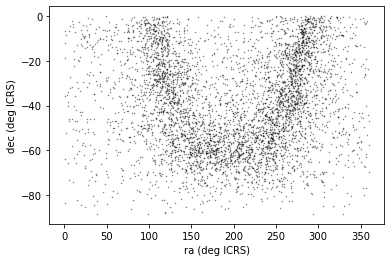

In [54]:
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')